# Consumer Complaint Data Analysis

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [5]:
df = pd.read_csv("consumer_complaints.csv")
df.head()


/var/folders/bl/4hy1jx015313sscgqhkmm6_c0000gn/T/ipykernel_44772/1438832334.py:1: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("consumer_complaints.csv")


,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


# Dataset Information

In [7]:
print("Number of dimensions in dataset : ", df.ndim)
print("Dimensions of dataset : ", df.shape)
print("Number of Features in the dataset: ", len(df.columns))
print("List of features in the dataset: ")
for i in range(len(df.columns)):
    print(end = "\t")
    print(str(i + 1)+". "+df.columns[i])
print('\n')
print("Number of elements in each feature of dataset:\n\n" , df.count()) #To get an idea if there are missing values.
print("\n\nCount of NaN values in each column:\n \n",df.isna().sum())  #Counting number of missing values in each column


Number of dimensions in dataset :  2
Dimensions of dataset :  (555957, 18)
Number of Features in the dataset:  18
List of features in the dataset: 
	1. date_received
	2. product
	3. sub_product
	4. issue
	5. sub_issue
	6. consumer_complaint_narrative
	7. company_public_response
	8. company
	9. state
	10. zipcode
	11. tags
	12. consumer_consent_provided
	13. submitted_via
	14. date_sent_to_company
	15. company_response_to_consumer
	16. timely_response
	17. consumer_disputed?
	18. complaint_id


Number of elements in each feature of dataset:

 date_received                   555957
product                         555957
sub_product                     397635
issue                           555957
sub_issue                       212622
consumer_complaint_narrative     66806
company_public_response          85124
company                         555957
state                           551070
zipcode                         551452
tags                             77959
consumer_consent_provid

In [8]:
df.state.unique(), len(df.state.unique())

(array(['CA', 'NY', 'MD', 'GA', 'AZ', 'IL', 'NC', 'TX', 'DC', 'KY', 'RI',
        'TN', 'AR', 'AL', 'NJ', 'VA', 'FL', 'MN', 'AK', 'OH', 'OR', 'MO',
        'LA', 'SC', 'OK', 'WA', 'PA', 'MI', 'CO', 'KS', 'MA', 'NH', 'NV',
        'WV', 'PR', 'DE', 'IN', 'UT', 'ME', 'NE', 'NM', 'WY', 'CT', 'HI',
        'ID', nan, 'MS', 'WI', 'IA', 'MT', 'MH', 'VT', 'AE', 'SD', 'FM',
        'VI', 'ND', 'GU', 'MP', 'AP', 'AS', 'PW', 'AA'], dtype=object),
 63)

Take out the complaints with invalid states

In [9]:
state_abbr = [
    'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
    'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
    'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
    'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
    'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
df = df[df['state'].isin(state_abbr)]


In [10]:
len(df)
df_disputed = df[df['consumer_disputed?'] == 'Yes']

# Complaints By State

In [11]:

state_freq = df.groupby('state').agg("count").issue.sort_values(ascending=False)
state_freq.reset_index()

,state,issue
0,CA,81700
1,FL,53673
2,TX,41352
3,NY,38266
4,GA,24548
5,NJ,22408
6,PA,20015
7,IL,19624
8,VA,18150
9,MD,17703


In [12]:

df_disputed_by_state = df_disputed.groupby('state').agg('count').issue.sort_values(ascending = False)
df_by_state = df.groupby('state').agg('count').issue.sort_values(ascending = False)
percent_disputed_by_state = (df_disputed_by_state/df_by_state)
percent_disputed_by_state.sort_values(ascending = False)


state
DE    0.229345
HI    0.225607
CO    0.221590
OR    0.221532
ME    0.220391
MD    0.219737
NV    0.218911
AZ    0.216877
MS    0.216732
CA    0.215606
NE    0.215270
VA    0.213499
WA    0.212307
IL    0.211781
RI    0.208004
WI    0.208000
MN    0.205324
NC    0.203148
MA    0.202792
CT    0.201552
MO    0.200747
OH    0.199540
NJ    0.198411
AL    0.197870
WY    0.197822
MI    0.197639
UT    0.197560
ID    0.197416
KY    0.196142
GA    0.195617
NY    0.195030
FL    0.194567
PA    0.194404
TN    0.193476
KS    0.189681
AK    0.189655
DC    0.189516
NH    0.187190
ND    0.186975
VT    0.185578
SC    0.185513
TX    0.183812
MT    0.183651
IN    0.183255
OK    0.182920
WV    0.182567
LA    0.181381
AR    0.181132
IA    0.178166
NM    0.162104
SD    0.161162
Name: issue, dtype: float64

<AxesSubplot:title={'center':'percent disputed by Product'}, xlabel='product', ylabel='percent'>

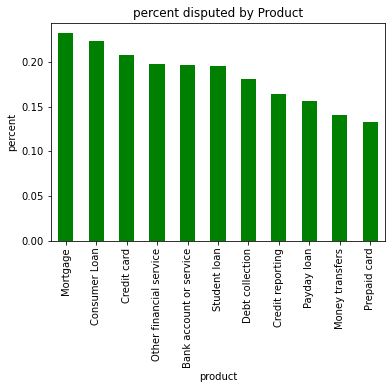

In [14]:
df_disputed_by_product = df_disputed.groupby('product').agg('count').issue.sort_values(ascending = False)
df_by_product = df.groupby('product').agg('count').issue.sort_values(ascending = False)
percent_disputed = (df_disputed_by_product/df_by_product).sort_values(ascending = False)
percent_disputed.plot.bar(ylabel = 'percent', title = 'Percent Disputed For Each Product', color = 'green')


<AxesSubplot:title={'center':'Total Issues For Each Product'}, xlabel='product', ylabel='percent'>

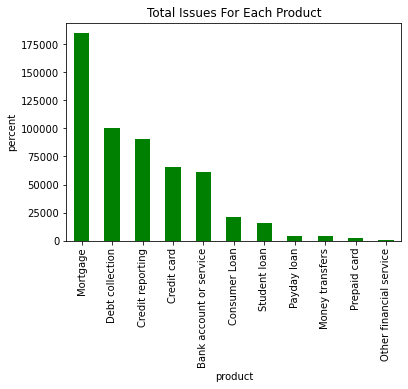

In [16]:
df_by_product.plot.bar(ylabel = 'percent', title = 'Total Issues For Each Product', color = 'green')

In [238]:
def choropleth(column, label, title): 
  fig, ax = plt.subplots(figsize=(25, 10))
  stateMap.plot(column=column, 
              legend = True, ax = ax,
              edgecolor="white",
              legend_kwds={'label': title,
                        'orientation': "vertical"})
  ax.set_xlim(-130, -63)
  ax.set_ylim(23, 50)
  ax.set_title(label)


NameError: name 'stateMap' is not defined

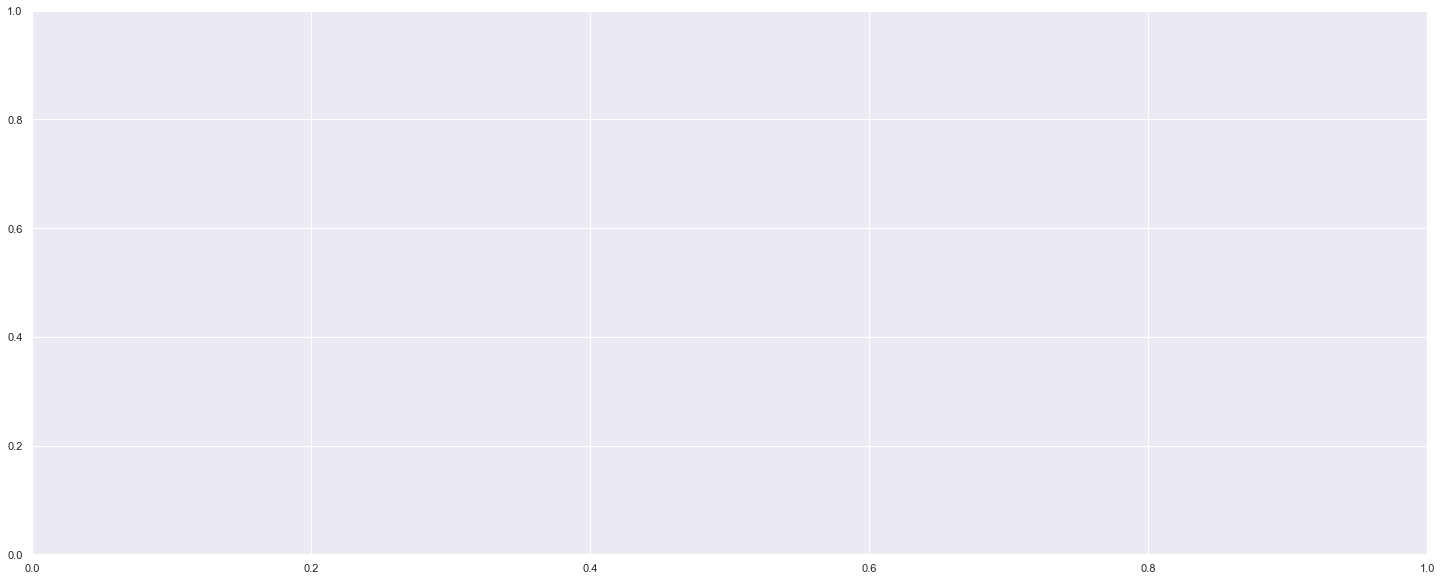

In [239]:
choropleth('percent_disputed_state', 'Total Number of Complaints by State', 'Number of Complaints')

# Complaints By Product

In [263]:
prod_freq = df[['product']].value_counts().to_frame()
prod_freq

,0
product,
Mortgage,184770
Debt collection,100028
Credit reporting,90721
Credit card,65546
Bank account or service,61077
Consumer Loan,20752
Student loan,15680
Payday loan,3843
Money transfers,3659


In [264]:

df_disputed_by_prod = df_disputed.groupby('product').agg('count').issue.sort_values(ascending = False)
df_by_prod = df.groupby('product').agg('count').issue.sort_values(ascending = False)
percent_disputed_by_prod = (df_disputed_by_prod/df_by_prod)
percent_disputed_by_prod.sort_values(ascending = False)

product
Mortgage                   0.232186
Consumer Loan              0.223256
Credit card                0.208037
Other financial service    0.198148
Bank account or service    0.196703
Student loan               0.195791
Debt collection            0.181569
Credit reporting           0.164317
Payday loan                0.156388
Money transfers            0.140749
Prepaid card               0.132787
Name: issue, dtype: float64

<AxesSubplot:xlabel='product'>

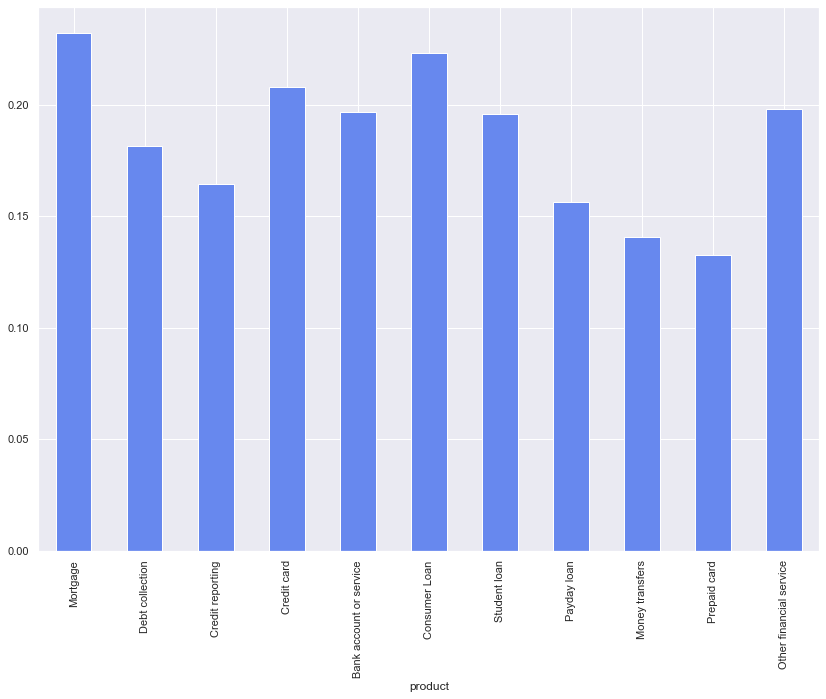

In [265]:
percent_disputed_by_prod.plot.bar(ylabel = 'percent', title = '')

# Complaints By Company

In [269]:
df.groupby('company').agg('count').issue.nlargest(25).sum(), df.groupby('company').agg('count').issue.nlargest(25)
    

(379677,
 company
 Bank of America                           55310
 Wells Fargo & Company                     41492
 JPMorgan Chase & Co.                      33461
 Equifax                                   31446
 Experian                                  30581
 TransUnion Intermediate Holdings, Inc.    25142
 Citibank                                  25110
 Ocwen                                     20818
 Capital One                               15447
 Nationstar Mortgage                       13155
 U.S. Bancorp                               9463
 Synchrony Financial                        9277
 Ditech Financial LLC                       8614
 Navient Solutions, Inc.                    7904
 PNC Bank N.A.                              6910
 Encore Capital Group                       6220
 HSBC North America Holdings Inc.           6087
 Amex                                       5666
 SunTrust Banks, Inc.                       4794
 Discover                                   4728
 T

In [183]:
array = ['Bank of America', 'Wells Fargo & Company', 'JPMorgan Chase & Co.', 'Equifax', 'Experian', 'Citibank', 
         'TransUnion Intermediate Holdings, Inc.','Ocwen', 'Capital One', 'Nationstar Mortgage', 'U.S. Bancorp', 
         'Synchrony Financial', 'Ditech Financial LLC', 'Navient Solutions, Inc.', 'PNC Bank N.A.', 'Encore Capital Group', 
         'HSBC North America Holdings Inc.','Amex', 'SunTrust Banks, Inc.', 'Discover', 'TD Bank US Holding Company', 
         'Select Portfolio Servicing, Inc','Citizens Financial Group, Inc.', 'Portfolio Recovery Associates, Inc.',
         'Fifth Third Financial Corporation']

df_companies = df[df.company.isin(array)]
df_companies

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
5,08/30/2013,Credit card,NaN,Application processing delay,NaN,NaN,NaN,Capital One,NY,12206,NaN,NaN,Phone,09/03/2013,Closed with explanation,Yes,Yes,510098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555947,10/05/2012,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,Citibank,NaN,NaN,NaN,NaN,Fax,10/09/2012,Closed with explanation,Yes,No,166125
555948,05/09/2014,Bank account or service,(CD) Certificate of deposit,Problems caused by my funds being low,NaN,NaN,NaN,Wells Fargo & Company,NaN,NaN,NaN,NaN,Phone,05/14/2014,Closed with explanation,Yes,Yes,844996
555949,03/16/2016,Bank account or service,Checking account,"Account opening, closing, or management",NaN,NaN,Company has responded to the consumer and the ...,U.S. Bancorp,NaN,NaN,Older American,NaN,Fax,03/16/2016,Closed with monetary relief,Yes,No,1834823
555951,05/17/2012,Credit card,NaN,Billing disputes,NaN,NaN,NaN,Capital One,NaN,NaN,NaN,NaN,Phone,05/18/2012,Closed with explanation,Yes,No,82674


In [234]:
df_companies.groupby(['company', 'product']).agg('count')[['state', 'issue']]


state  issue
company               product                              
Amex                  Bank account or service    303    306
                      Consumer Loan                9      9
                      Credit card               4684   4733
                      Credit reporting            25     25
                      Debt collection            284    287
...                                              ...    ...
Wells Fargo & Company Mortgage                 24905  25106
                      Other financial service     34     34
                      Payday loan                 15     15
                      Prepaid card                20     20
                      Student loan               986    994

[237 rows x 2 columns]

# Complaints By Submission

In [18]:
sub_freq = df[['submitted_via']].value_counts().to_frame()
sub_freq

,0
submitted_via,
Web,358695
Referral,107374
Phone,38800
Postal mail,36052
Fax,7841
Email,294


<AxesSubplot:title={'center':'Number Of Complaints From Each Form Of Submission'}, xlabel='Form Of Submission', ylabel='Number of Complaints'>

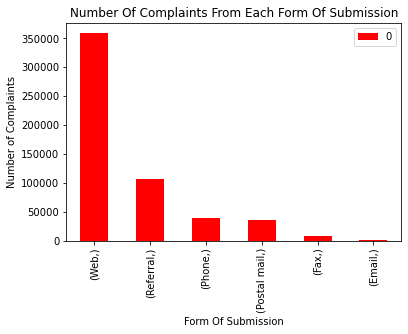

In [22]:
sub_freq.plot.bar(xlabel = 'Form Of Submission', ylabel = 'Number of Complaints', title = 'Number Of Complaints From Each Form Of Submission', color = 'red')

In [23]:
df_disputed_by_sub = df_disputed.groupby('submitted_via').agg('count').issue.sort_values(ascending = False)
df_by_sub = df.groupby('submitted_via').agg('count').issue.sort_values(ascending = False)
percent_disputed = (df_disputed_by_sub/df_by_sub).sort_values(ascending = False)
percent_disputed

submitted_via
Web            0.219972
Fax            0.216299
Email          0.214286
Referral       0.171177
Phone          0.169175
Postal mail    0.146011
Name: issue, dtype: float64

<AxesSubplot:title={'center':'Percent Disputed From Each Form Of Submission'}, xlabel='Form Of Submission', ylabel='Percent Disputed'>

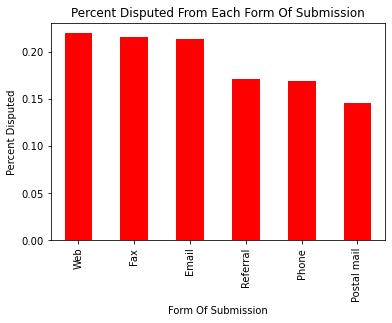

In [24]:
percent_disputed.plot.bar(xlabel = 'Form Of Submission', ylabel = 'Percent Disputed', title = 'Percent Disputed From Each Form Of Submission', color = 'red')